<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/SEM1/ML/lab_11_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest


##  Task

Predict the max temperature for tomorrow for a city.

This is a supervised, regression machine learning problem. It is Supervised as both the features (data for the city) and the targets (temperature) are available for training. It is Regression, becuase the target value is continuous.

Ref: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0


## 1. Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## 2. Prepare the dataset

In [2]:
## Import the dataset

df = pd.read_csv('temps.csv')
# change the path as necessary

print(df.head())

   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  


Text(0.5, 1.0, 'Friend Estimate')

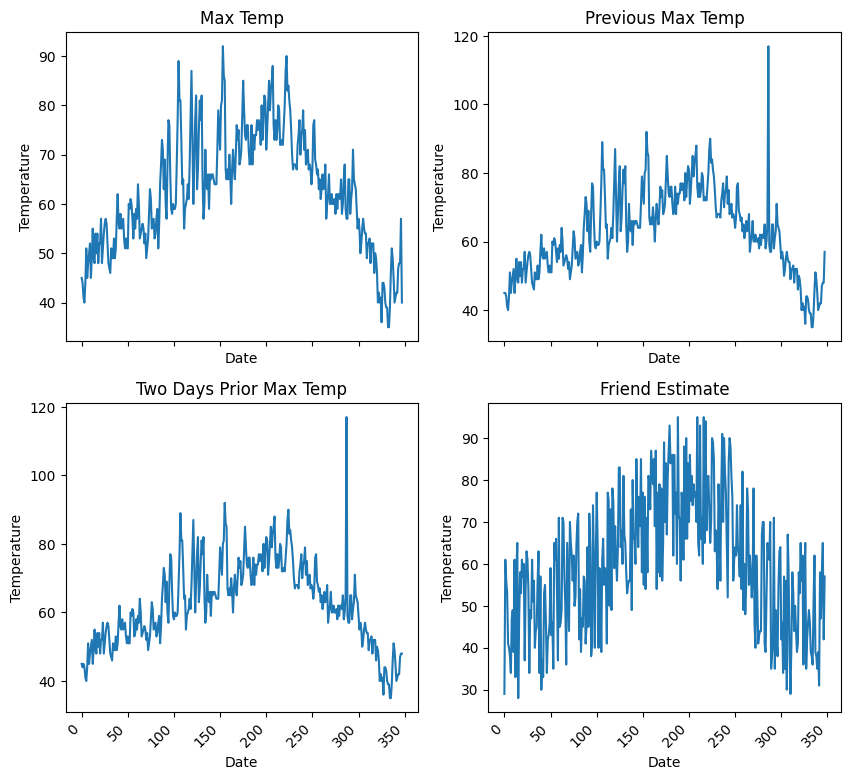

In [3]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(df['actual'])
ax1.set_xlabel('Date'); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(df['temp_1'])
ax2.set_xlabel('Date'); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# Temperature from 2 days ago
ax3.plot(df['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(df['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

# This plot can be improved by grouping x-axis values in terms of month.

In [4]:
# Perform One-Hot Encoding for categorical data.
# In this case, the column 'week'

features = pd.get_dummies(df)
features.head(7)


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,46,46,46,41,False,False,False,False,False,True,False
5,2016,1,6,40,44,46.1,51,43,49,48,40,False,False,False,False,False,False,True
6,2016,1,7,44,51,46.2,45,45,49,46,38,False,False,False,False,True,False,False


In [5]:
# Convert to numpy array the training data and the target feature

X= features.drop('actual', axis = 1) # axis 1 refers to the columns
names = list(X.columns)
X = np.array(X)

y = np.array(features['actual'])


In [6]:
# Split data into training and testing sets

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.25)


In [7]:
print('Training Features :', X_train.shape)
print('Training Labels :', y_train.shape)
print('Testing Features :', X_test.shape)
print('Testing Labels :', y_test.shape)

Training Features : (261, 17)
Training Labels : (261,)
Testing Features : (87, 17)
Testing Labels : (87,)


## 3. Build the Model

In [8]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth = 3)


In [9]:
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=1000, random_state=42)

## 4. Make Predictions

In [10]:
predictions = rf.predict(X_test)


## 5. Performance Measures

In [11]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 3.87 degrees.


In [12]:
# Accuracy

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.69 %.


## 6. Visualize random forest

Decision Tree # 3


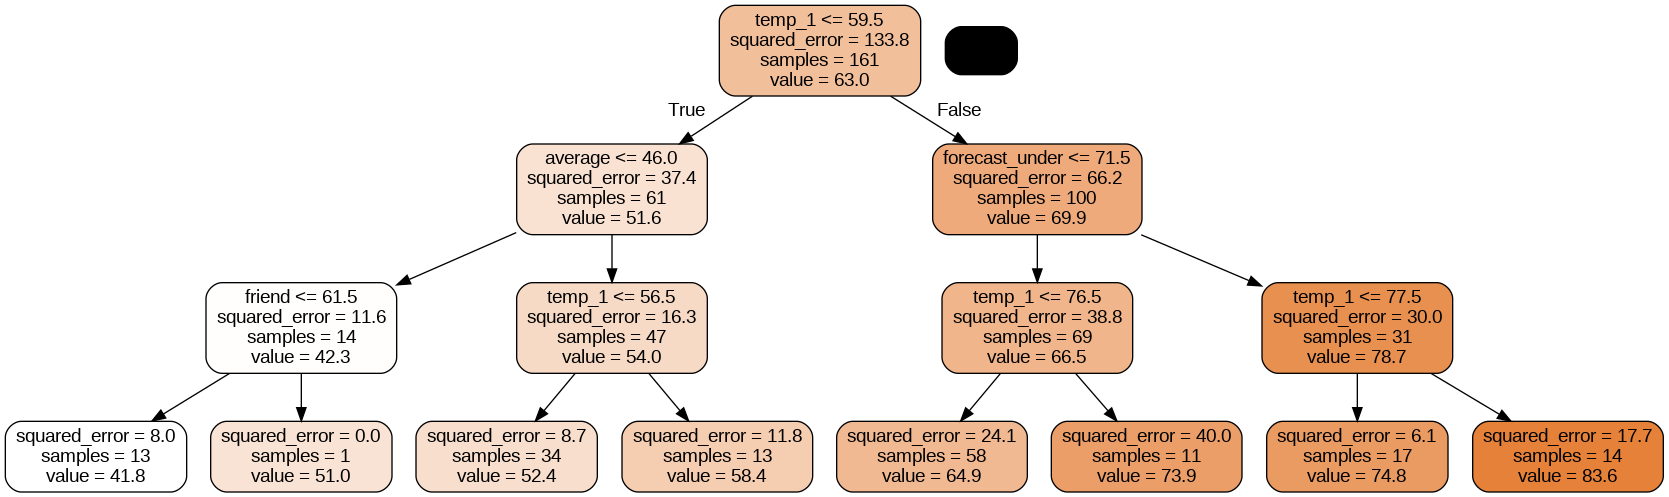

In [14]:
from io import StringIO
from sklearn.tree import export_graphviz

dot_data = StringIO()

tree = rf.estimators_[3]

export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = names, precision=1)

import pydotplus

# may need to install
# conda install -c conda-forge pydotplus

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

print('Decision Tree # 3')
from IPython.display import Image
Image(graph.create_png())


Decision Tree # 995


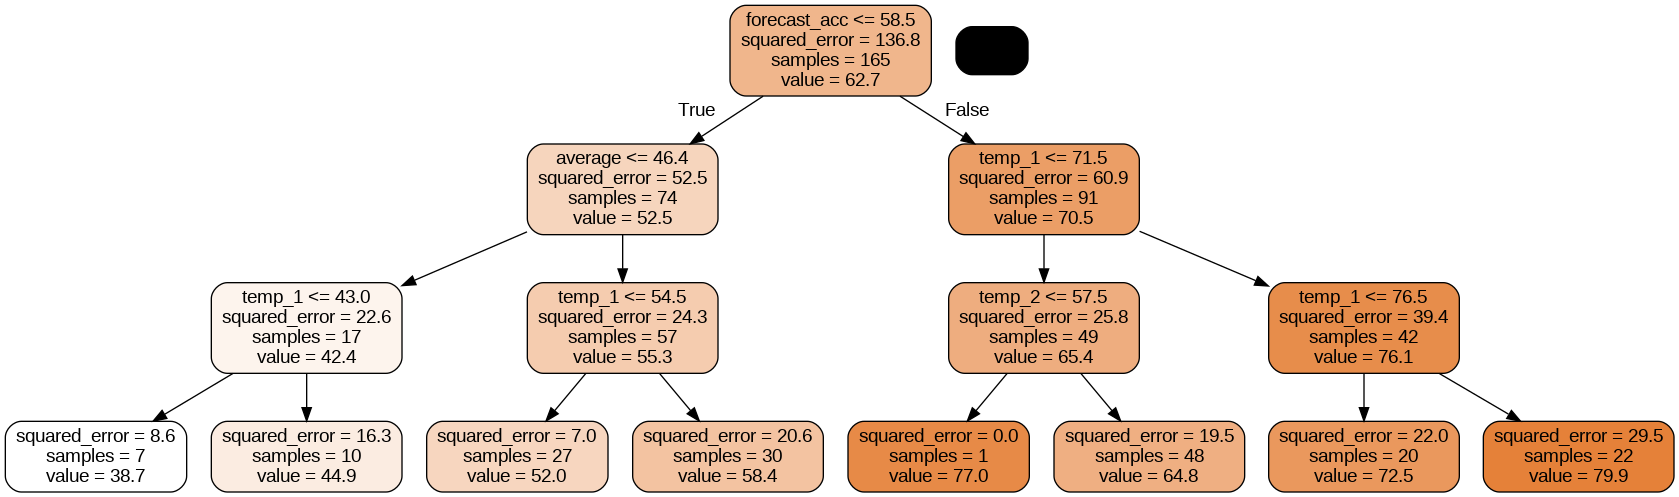

In [15]:
from io import StringIO
from sklearn.tree import export_graphviz

dot_data = StringIO()

tree = rf.estimators_[995]

export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = names, precision=1)

import pydotplus

# may need to install
# conda install -c conda-forge pydotplus

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

print('Decision Tree # 995')
from IPython.display import Image
Image(graph.create_png())